In [1]:
#!pip install skforecast

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from numpy import log

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Configuración warnings
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')


In [3]:
lugar_nacimiento=pd.read_csv('lugar_nacimiento_171334.csv', sep=';')
lugar_nacimiento

,Unnamed: 0,Catalunya,Mateixa comarca,Altra comarca,Resta de l'Estat,Estranger,Total
0,2022,1446,969,477,69,230,1745
1,2021,1420,967,453,70,221,1711
2,2020,1424,982,442,70,218,1712
3,2019,1414,984,430,68,201,1683
4,2018,1419,991,428,64,177,1660
5,2017,1406,1002,404,63,160,1629
6,2016,1431,1023,408,65,166,1662
7,2015,1446,1038,408,68,160,1674
8,2014,1452,1049,403,72,170,1694
9,2013,1450,1056,394,69,167,1686


In [4]:
lugar_nacimiento=lugar_nacimiento.rename(columns={'Unnamed: 0': 'Año'})

In [5]:
lugar_nacimiento.columns

Index(['Año', 'Catalunya', 'Mateixa comarca', 'Altra comarca',
       'Resta de l'Estat', 'Estranger', 'Total'],
      dtype='object')

In [6]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [7]:
lugar_nacimiento.columns

Index(['Año', 'Catalunya', 'Mateixa comarca', 'Altra comarca',
       'Resta de l'Estat', 'Estranger', 'Total'],
      dtype='object')

In [8]:
lugar_nacimiento_planes=lugar_nacimiento.sort_values(by='Año', ascending=True)
lugar_nacimiento_planes

,Año,Catalunya,Mateixa comarca,Altra comarca,Resta de l'Estat,Estranger,Total
22,2000,1588,1227,361,80,56,1724
21,2001,1617,1247,370,80,71,1768
20,2002,1596,1222,374,77,77,1750
19,2003,1583,1207,376,74,71,1728
18,2004,1569,1187,382,73,78,1720
17,2005,1566,1168,398,80,108,1754
16,2006,1586,1182,404,82,130,1798
15,2007,1585,1174,411,82,142,1809
14,2008,1558,1161,397,79,158,1795
13,2009,1520,1141,379,72,164,1756


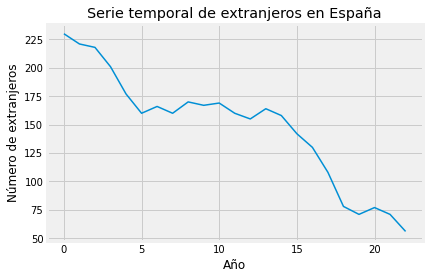

In [9]:
#Visualizar la serie temporal
plt.plot(lugar_nacimiento_planes['Estranger'])
plt.xlabel('Año')
plt.ylabel('Número de extranjeros')
plt.title('Serie temporal de extranjeros en España')
plt.show()

Evaluamos la estacionariedad de la serie temporal utilizando la prueba de Dickey-Fuller aumentada
Estacionariedad: La estacionariedad se refiere a la consistencia en las propiedades estadísticas de una serie temporal a lo largo del tiempo. Es importante hacer que la serie sea estacionaria para que sea más fácil de modelar. Puede lograrse a través de técnicas como la diferenciación y la transformación de Box-Cox.


In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(lugar_nacimiento['Estranger'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 2.158135229859563
p-value: 0.9988462537669933


Como el valor p es mayor que el nivel de significancia del 5%, no podemos rechazar la hipótesis nula de que la serie de tiempo tiene una raíz unitaria y, por lo tanto, es no estacionaria. En otras palabras, la serie de tiempo **no parece ser estacionaria.**


**ARIMA** significa **"AutoRegressive Integrated Moving Average"** y es un modelo estadístico utilizado para analizar y predecir series temporales. ARIMA combina tres técnicas diferentes: la regresión autoregresiva (AR), la diferenciación integrada (I) y el promedio móvil (MA).

Pasos a seguir para el modelado ARIMA:

- Identificación del Modelo.

- Ajustar el modelo.

- Diagnostico del modelo.

- Pronósticos.

In [11]:
from pmdarima.arima import ADFTest
# Crear un objeto ADFTest
adf_test = ADFTest(alpha=0.05)

# Realizar el test de Dickey-Fuller aumentada
adf_test.should_diff(lugar_nacimiento['Estranger'])

(0.6851790288630836, True)

Indica que la estadística ADF es de 0.6851790288630836 y el valor p es menor que el nivel de significancia del 5%, lo que sugiere que podemos rechazar la hipótesis nula de que la serie de tiempo tiene una raíz unitaria y, por lo tanto, es no estacionaria.

In [12]:
serie_extranjeros_planes = lugar_nacimiento_planes[['Año', 'Estranger']]
serie_extranjeros_planes = serie_extranjeros_planes.set_index('Año')
serie_extranjeros_planes.index = pd.to_datetime(serie_extranjeros_planes.index, format='%Y')
serie_extranjeros_planes = serie_extranjeros_planes['Estranger']

In [13]:
#Verificar la estacionaridad de la serie temporal
resultados_adf = adfuller(serie_extranjeros_planes)
print('ADF Statistic: %f' % resultados_adf[0])
print('p-value: %f' % resultados_adf[1])
print('Critical Values:')
for key, value in resultados_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.482489
p-value: 0.542155
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702


En esta ocasión haremos 2 diferencias para revisar como nos da la autocorrelación y luego volver a realizar la prueba de Dickey-Fuller

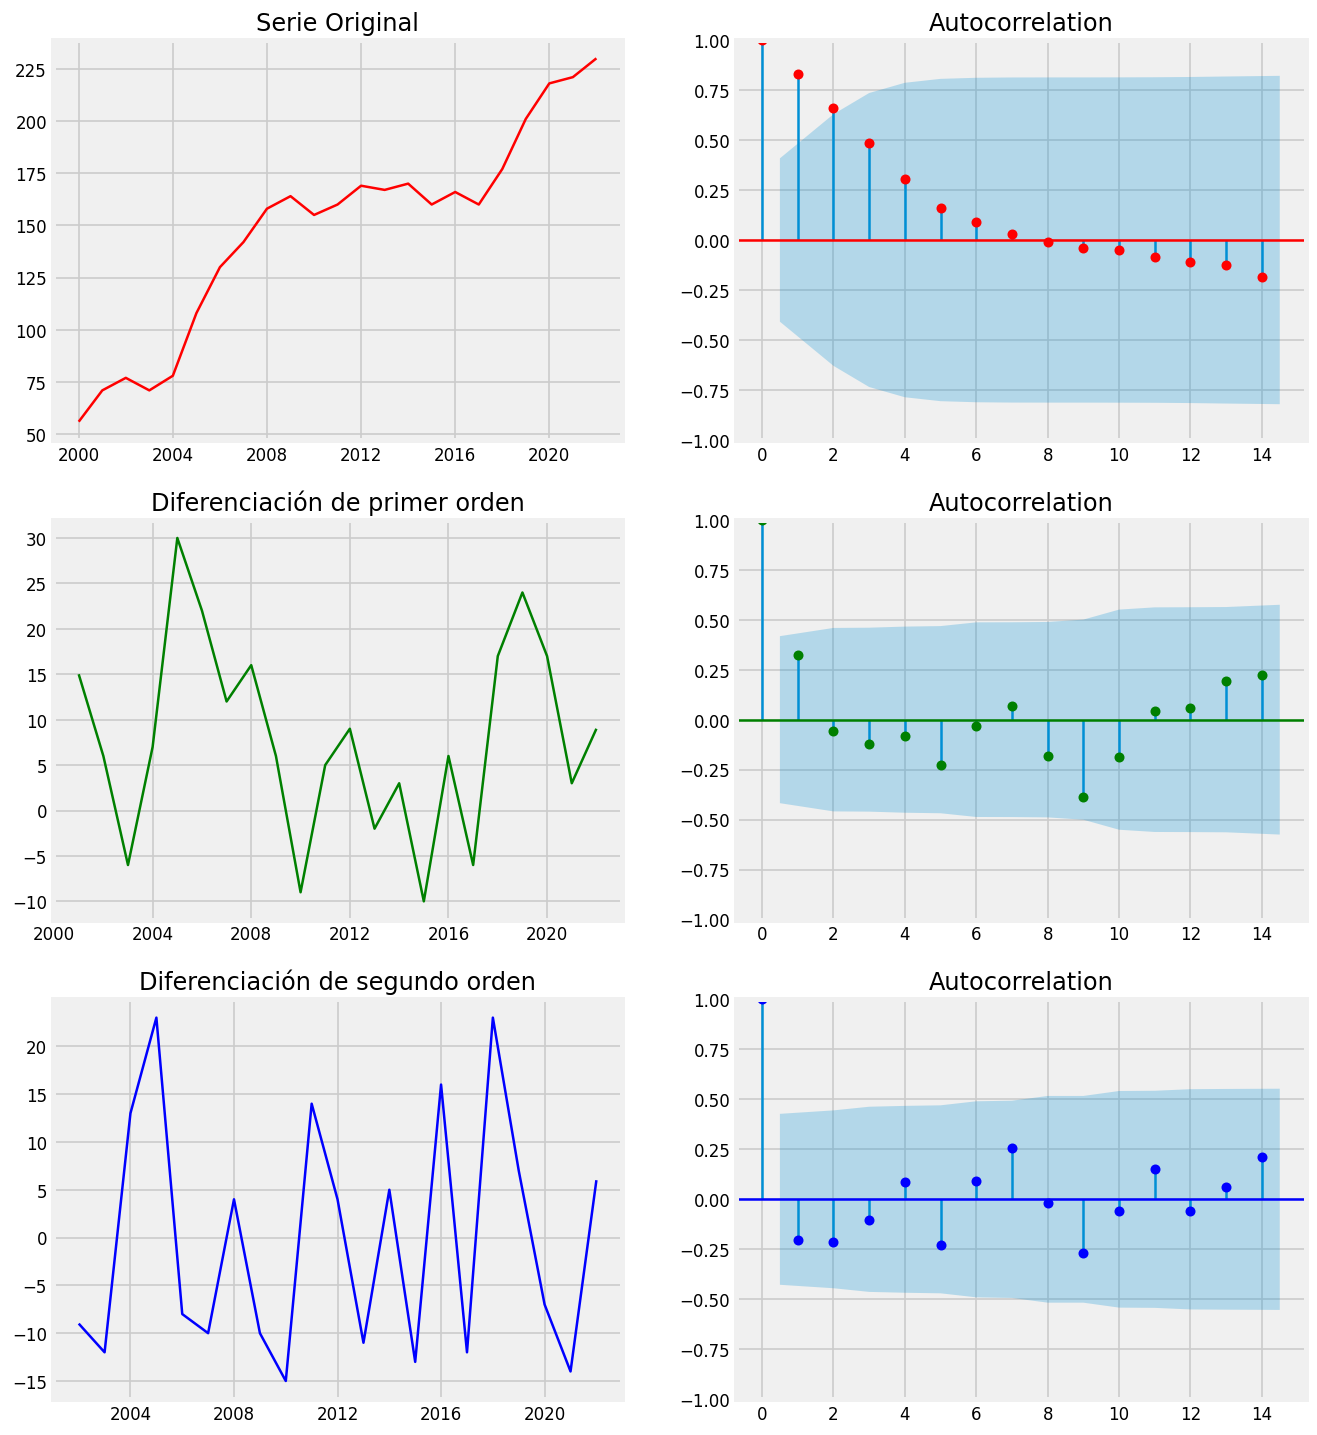

In [14]:
# Paso 6: Graficar la autocorrelación y autocorrelación parcial con 1ra y 2da diferenciación

plt.rcParams.update({'figure.figsize':(12,15), 'figure.dpi':120})

#Serie Original
fig, axes = plt.subplots(3,2, sharex=False)
axes[0,0].plot(serie_extranjeros_planes, color="r"); axes [0,0].set_title('Serie Original')
plot_acf(serie_extranjeros_planes, ax=axes[0,1], color="r")

#Primera diferenciación
axes[1,0].plot(serie_extranjeros_planes.diff(), color="g"); axes [1,0].set_title("Diferenciación de primer orden")
plot_acf(serie_extranjeros_planes.diff().dropna(), ax=axes[1,1], color="g")

#Segunda diferenciación
axes[2,0].plot(serie_extranjeros_planes.diff().diff(), color="b"); axes[2,0].set_title("Diferenciación de segundo orden")
plot_acf(serie_extranjeros_planes.diff().diff().dropna(), ax=axes[2,1], color="b")

plt.show()

Al tomar la primera orden observamos que la serie se estabiliza en torno a un valor medio en la segunda diferenciación por la que nos quedamos con esta.

Así mismo el correlograma confirma un declinamiento rápido en el tiempo de la AFC y PAFC.
La serie temporal la estancionareidad con 2 órdenes de diferenciación. Pero al mirar el gráfico de autocorrelación para la segunda diferenciación, el retraso no entra en la zona negativa, pero si hubiese sido asi estaría sobre diferenciada.



In [15]:
#segunda prueba con los datos diferenciados 1 vez

result=adfuller(serie_extranjeros_planes.diff().dropna())
print('ADF Stadistics: %f' % result[0])
print('p-value: %f' % result[1])


ADF Stadistics: -3.832086
p-value: 0.002596


Con esta segunda ya me da bien, igualmente veo cuando me da con las 2da:

In [16]:
#segunda prueba con los datos diferenciados 2 veces

result=adfuller(serie_extranjeros_planes.diff().diff().dropna())
print('ADF Stadistics: %f' % result[0])
print('p-value: %f' % result[1])


ADF Stadistics: -5.255104
p-value: 0.000007


El valor de $d=1$

Fechas train : 2000-01-01 00:00:00 --- 2015-01-01 00:00:00  (n=16)
Fechas test  : 2016-01-01 00:00:00 --- 2022-01-01 00:00:00  (n=7)


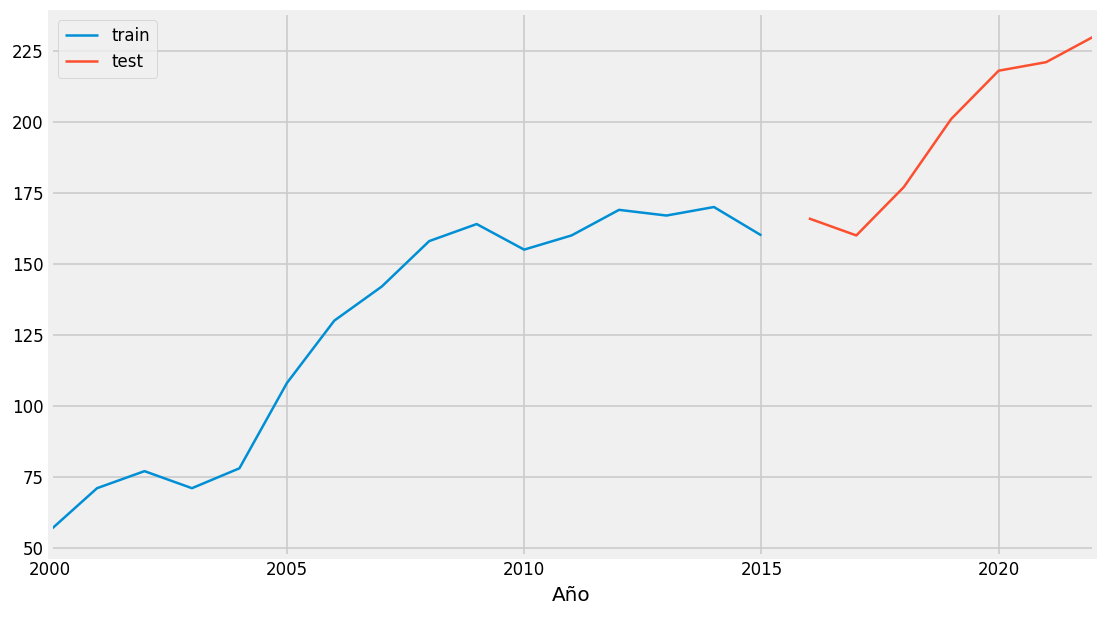

In [21]:
# Separación datos train-test
# ==============================================================================
steps = 7 #se utilizan los últimos 7 años como conjunto test para evaluar la capacidad del modelo
datos_train = serie_extranjeros_planes[:-steps]
datos_test  = serie_extranjeros_planes[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(10, 6))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
ax.legend();

fig.savefig('train_testarima_planes.png')

In [22]:
# Paso 7: Elegir los parámetros del modelo ARIMA
modelo_auto = auto_arima(serie_extranjeros_planes, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=169.715, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=169.367, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=168.917, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=177.667, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=170.901, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=170.888, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=172.410, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=173.545, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.706 seconds


In [23]:
predicciones_arima = modelo_auto.predict(n_periods=10)
predicciones_arima

2023-01-01    239.256559
2024-01-01    247.319827
2025-01-01    255.383096
2026-01-01    263.446365
2027-01-01    271.509633
2028-01-01    279.572902
2029-01-01    287.636170
2030-01-01    295.699439
2031-01-01    303.762708
2032-01-01    311.825976
Freq: AS-JAN, dtype: float64

Luego, podemos evaluar el desempeño del modelo utilizando alguna métrica de error, como el error cuadrático medio (MSE) o el error absoluto medio (MAE), por ejemplo:

In [24]:
from sklearn.metrics import mean_absolute_error
error_mse = mean_squared_error(y_true=datos_test, y_pred=predicciones_arima)
print(f"Error de test (mse): {error_mse}")

error_mae = mean_absolute_error(y_true=datos_test, y_pred=predicciones_arima)
print(f"Error de test (mae): {error_mae}")

ValueError: Found input variables with inconsistent numbers of samples: [7, 10]

El error de test (MSE) es bastante alto y el error de test (MAE) también es elevado en relación con el valor medio de los datos. Podría ser una señal de que el modelo ARIMA no está capturando bien la dinámica de los datos y necesitarías probar otros modelos o ajustar mejor los parámetros del ARIMA.

In [25]:
from pmdarima.arima import auto_arima

param_grid = {
    'p': [0, 1, 2, 3, 4, 5],
    'd': [0, 1, 2],
    'q': [0, 1, 2, 3, 4, 5],
    'P': [0, 1, 2],
    'D': [0, 1, 2],
    'Q': [0, 1, 2],
}

modelo = auto_arima(datos_train, seasonal=False, trace=True, error_action='ignore',
                    suppress_warnings=True, stepwise=False, scoring='mse', 
                    random_state=123, n_jobs=-1, start_p=0, start_q=0, max_order=None, 
                    test='adf', seasonal_test='ocsb', m=1, 
                    d=None, D=None, trace_offset=None, 
                    callback=None, offset_test_args=None, 
                    seasonal_test_args=None, 
                    suppress_arima_warnings=False, 
                    param_grid=param_grid)


Best model:  ARIMA(4,2,0)(0,0,0)[0] intercept
Total fit time: 10.325 seconds


In [26]:
datos_test_array = np.array(datos_test.values)

In [27]:
# Ajustar modelo ARIMA con los hiperparámetros óptimos encontrados mediante Grid Search
modelo_ajustado = ARIMA(datos_train, order=(1,1,0)).fit()

# Realizar predicciones con el modelo ajustado
predicciones_ajustado = modelo_ajustado.forecast(steps=len(datos_test))[0]

# Calcular métricas de error para el modelo ajustado
mse_ajustado = mean_squared_error(datos_test_array.reshape(-1, 1), predicciones_ajustado.reshape(-1, 1))
mae_ajustado = mean_absolute_error(datos_test_array.reshape(-1, 1), predicciones_ajustado.reshape(-1, 1))

print(f"Error de test (mse) para modelo ajustado: {mse_ajustado}")
print(f"Error de test (mae) para modelo ajustado: {mae_ajustado}")

# Calcular métricas de error para el modelo original
predicciones_original = modelo_auto.predict(n_periods=len(datos_test))
mse_original = mean_squared_error(datos_test_array, predicciones_original)
mae_original = mean_absolute_error(datos_test_array, predicciones_original)

print(f"Error de test (mse) para modelo original: {mse_original}")
print(f"Error de test (mae) para modelo original: {mae_original}")

C:\Users\flore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\flore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\flore\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


ValueError: Found input variables with inconsistent numbers of samples: [7, 1]

El siguiente paso es validar el modelo para determinar si es adecuado para hacer predicciones.

Para validar el modelo, se puede seguir los siguientes pasos:

- Dividir los datos en conjuntos de entrenamiento y prueba.
- Ajustar el modelo al conjunto de entrenamiento.
- Hacer predicciones utilizando el conjunto de prueba.
- Evaluar la precisión del modelo utilizando métricas de evaluación como el error cuadrático medio (MSE) o el error absoluto medio (MAE).
- Si el modelo no es preciso, ajustarlo y repetir los pasos 2 a 4 hasta que se obtenga un modelo preciso.
- Una vez que el modelo ha sido validado, se puede utilizar para hacer predicciones futuras en la serie temporal. Para hacer una predicción, se utiliza el modelo ajustado y se proporciona un valor de entrada para el periodo de tiempo futuro que se desea predecir.

In [ ]:
freq = pd.infer_freq(datos_train.index)
datos_train.index = pd.date_range(start=datos_train.index[0], periods=len(datos_train), freq=freq)

In [ ]:
freq = pd.infer_freq(datos_test.index)
datos_test.index = pd.date_range(start=datos_test.index[0], periods=len(datos_test), freq=freq)

Fechas train : 2000-01-01 00:00:00 --- 2012-01-01 00:00:00  (n=13)
Fechas test  : 2013-01-01 00:00:00 --- 2022-01-01 00:00:00  (n=10)


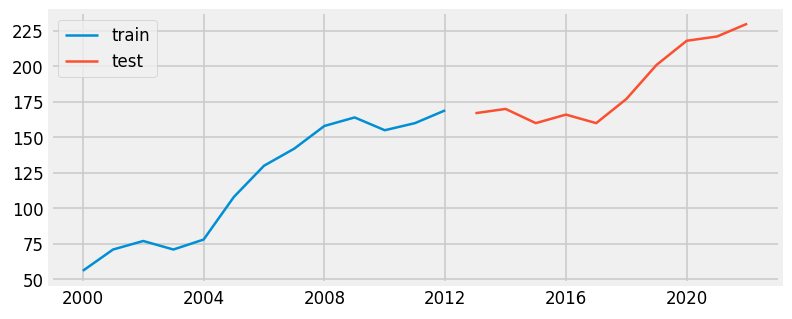

In [28]:
# Separación datos train-test
steps = 10   #el 80 por ciento
datos_train = serie_extranjeros_planes[:-steps]
datos_test  = serie_extranjeros_planes[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(datos_train.index, datos_train, label='train')
ax.plot(datos_test.index, datos_test, label='test')

ax.legend();

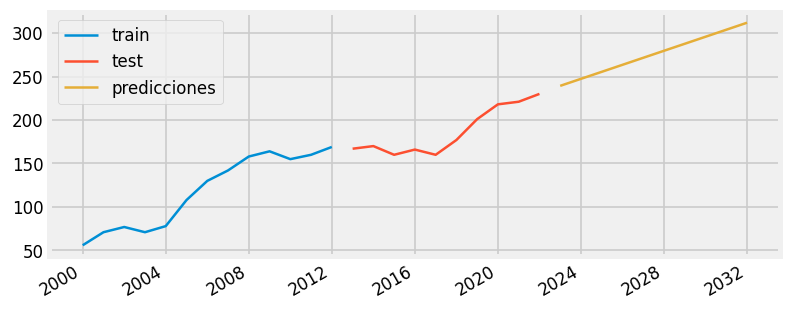

In [31]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(datos_train.index, datos_train, label='train')
ax.plot(datos_test.index, datos_test, label='test')
predicciones_arima.plot(ax=ax, label='predicciones')
ax.legend();

fig.savefig('prediccion_planes_arima.png')

Utilizaremos el 80% para el Training Test.
Y el 20% para el Test Set.

### ForecasterAutoreg

Se crea y entrena un modelo ForecasterAutoreg a partir de un regresor RandomForestRegressor y una ventana temporal de 6 lags. Esto último significa que, el modelo, utiliza como predictores los 6 meses anteriores.

In [ ]:
# Crear y entrenar forecaster
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )

forecaster.fit(y=datos_train)
forecaster

Algunos elementos que podrían ser relevantes para este análisis incluye:

- Regresor utilizado: esto describe el tipo de modelo de aprendizaje automático que se utilizó para predecir los valores futuros de la serie temporal. En este caso, se utilizó un RandomForestRegressor.
- Lags: estos son los retrasos que se utilizaron para entrenar el modelo. En este caso, se utilizaron los retrasos 1 a 6.
- Window size: esto se refiere a la cantidad de observaciones anteriores que se utilizaron para predecir el siguiente valor en la serie temporal. En este caso, se utilizó una ventana de tiempo de 6.
- Training range: esto describe el rango de fechas que se utilizaron para entrenar el modelo. En este caso, se utilizó el rango del índice de la serie temporal desde el inicio hasta el índice 16.
- Regressor parameters: esto describe los hiperparámetros que se utilizaron para configurar el modelo de regresión utilizado. En este caso, se utilizó un modelo de bosque aleatorio con 100 estimadores y una semilla aleatoria de 123.

### Predicciones

Una vez entrenado el modelo, se predicen los datos de test (7 años a futuro). 

In [ ]:
steps = 10
predicciones = forecaster.predict(steps=steps)
predicciones.head(5)

In [ ]:
inicio = datos_test.index[0]
rango_prediccion = pd.date_range(inicio, periods=steps, freq='Y')
predicciones.index = rango_prediccion

Ahora verificamos con los datos test

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize=(7, 3))
datos_train.plot(ax=ax, label='train')
datos_test.plot(ax=ax, label='test')
predicciones_arima.plot(ax=ax, label='predicciones')
ax.legend();

fig.savefig('prediccion_arima_lesplanes.png')

### Error de las predicciones en el conjunto de test

Se cuantifica el error que comete el modelo en sus predicciones. En este caso, se emplea como métrica el mean squared error (mse).

In [ ]:
# Error test
# ==============================================================================
error_mse = mean_squared_error(
                y_true = datos_test,
                y_pred = predicciones
            )

print(f"Error de test (mse): {error_mse}")

El error es muy malo

### Ajuste de hiperparámetros (tuning)


El ForecasterAutoreg entrenado ha utilizado una ventana temporal de 6 lags y un modelo Random Forest con los hiperparámetros por defecto. Sin embargo, no hay ninguna razón por la que estos valores sean los más adecuados. Para identificar la mejor combinación de lags e hiperparámetros, la librería Skforecast dispone de la función grid_search_forecaster con la que comparar los resultados obtenidos con cada configuración del modelo.

In [ ]:
# Grid search de hiperparámetros
steps = 5
forecaster = ForecasterAutoregCustom(
                regressor      = RandomForestRegressor(random_state=123),
                fun_predictors = custom_predictors,
                window_size    = 20
             )

# Hiperparámetros del regresor
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

In [ ]:
# Grid search de hiperparámetros
steps = 5
forecaster = ForecasterAutoregCustom(
                regressor      = RandomForestRegressor(random_state=123),
                fun_predictors = custom_predictors,
                window_size    = 20
             )

# Hiperparámetros del regresor
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

resultados_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = datos_train['y'],
                        param_grid  = param_grid,
                        steps       = steps,
                        refit       = True,
                        metric      = 'mean_squared_error',
                        initial_train_size = int(len(datos_train)*0.5),
                        fixed_train_size = False,
                        return_best = True,
                        verbose     = False
                    )

# a partir de aca intento con cada uno de lo lugares de la zona
